用 MinimumEigenOptimizer 解决 qubo

In [ ]:
from qiskit_optimization.problems import QuadraticProgram
qp = QuadraticProgram()
qp.binary_var('x')
qp.binary_var('y')
qp.binary_var('z')
qp.minimize(linear = {'y':-1}, quadratic = {('x','y'):2, ('z','y'):-4})
qp.linear_constraint(linear = {'x':1, 'y':2, 'z':3},
sense ="<=", rhs = 5)
print(qp.export_as_lp_string())

In [ ]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import NumPyMinimumEigensolver
np_solver = NumPyMinimumEigensolver()
np_optimizer = MinimumEigenOptimizer(np_solver)
result = np_optimizer.solve(qp)
print(result)

qaoa

In [ ]:
from qiskit import Aer
from qiskit.algorithms import QAOA
from qiskit.algorithms.optimizers import COBYLA
from qiskit.utils import QuantumInstance
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"),
shots = 1024)
qaoa = QAOA(optimizer = COBYLA(),
quantum_instance=quantum_instance, reps = 1)
qaoa_optimizer = MinimumEigenOptimizer(qaoa)
result = qaoa_optimizer.solve(qp)
print(result)

In [ ]:
print('Variable order:', [var.name for var in result.variables])
for s in result.samples:
    print(s)

In [ ]:
print(result.min_eigen_solver_result)

In [ ]:
from qiskit_optimization.converters import QuadraticProgramToQubo
qp_to_qubo = QuadraticProgramToQubo()
qubo = qp_to_qubo.convert(qp)
print(qubo.export_as_lp_string())

ising

In [ ]:
H1, offset = qubo.to_ising()

print("The Hamiltonian is", H1)
print("The constant term is", offset)

In [ ]:
from qiskit_optimization.runtime import QAOAClient
from qiskit import IBMQ
provider = IBMQ.load_account()
qaoa_client = QAOAClient(provider=provider,backend=provider.get_backend("ibm_lagos"), reps=1)
qaoa = MinimumEigenOptimizer(qaoa_client)
result = qaoa.solve(qp)
print(result)

shu

In [19]:
from qiskit.opflow import Z
from qiskit.algorithms import QAOA
H1 = Z^Z # Define Z_0Z_1
# qaoa = QAOA()
# circuit = qaoa.construct_circuit([1,2],H1)[0]
# circuit.draw(output="mpl")

In [20]:
#circuit.decompose().decompose().draw(output="mpl")

C:\Users\Newt\AppData\Local\Temp\ipykernel_34400\893502146.py:1: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.qaoa.QAOA`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.QAOA``. See https://qisk.it/algo_migration for a migration guide.
  qaoa = QAOA(reps = 2)


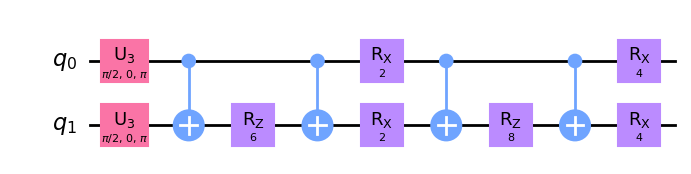

In [27]:
qaoa = QAOA(reps = 2)
circuit = qaoa.construct_circuit([1,2,3,4],H1)[0]
circuit.decompose().decompose().draw(output="mpl")

In [28]:
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit import Aer
from qiskit.algorithms.optimizers import COBYLA
seed = 1024
algorithm_globals.random_seed = seed
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"),
seed_simulator=seed, seed_transpiler=seed,
shots = 10)
qaoa = QAOA(optimizer = COBYLA(), quantum_instance=quantum_instance)
result = qaoa.compute_minimum_eigenvalue(H1)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 22,
    'eigenstate': {'01': 0.5477225575051661, '10': 0.8366600265340756},
    'eigenvalue': (-1+0j),
    'optimal_circuit': None,
    'optimal_parameters': {   ParameterVectorElement(β[0]): -2.016731482242479,
                              ParameterVectorElement(γ[0]): -2.487540481338744},
    'optimal_point': array([-2.01673148, -2.48754048]),
    'optimal_value': -1.0,
    'optimizer_evals': None,
    'optimizer_result': None,
    'optimizer_time': 0.03153705596923828}


C:\Users\Newt\AppData\Local\Temp\ipykernel_34400\2752331623.py:6: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"),
C:\Users\Newt\AppData\Local\Temp\ipykernel_34400\2752331623.py:9: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.qaoa.QAOA`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.QAOA``. See https://qisk.it/algo_migration for a migration guide.
  qaoa = QAOA(optimizer = COBYLA(), quantum_instance=quantum_instance)
